In [7]:
import pandas as pd
import sys
from numpy import int16, float16
from pprint import pprint as pp
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('result_all_columns.pkl')
df

,id,name,language,runtime,premiered,weight
0,26133,Carol Burnett & Company,8,60.0,1979-08-18,32
1,7110,Carla Cametti PD,8,60.0,2009-01-08,32
2,23797,The Carol Burnett Show,8,60.0,1991-11-01,54
3,27692,Carrier,8,60.0,2008-04-27,51
4,2718,Carnival Cravings with Anthony Anderson,8,30.0,2015-08-12,39
...,...,...,...,...,...,...
10195,20710,Crazyhead,8,60.0,2016-10-19,92
10196,52953,Crime Scene,8,NaN,2021-02-10,88
10197,2260,Crazy Ex-Girlfriend,8,60.0,2015-10-12,81
10198,5603,Crime & Punishment,8,60.0,2002-06-16,72


In [88]:
memory_usage_start = df.memory_usage(deep=True, index=False)
print(f'Использование памяти: {memory_usage_start.sum()}')
memory_usage_start_dict = memory_usage_start.to_dict()
memory_usage_start_dict = {k: v for k, v in sorted(memory_usage_start_dict.items(), key=lambda item: -item[1])}

data = []
column_types_dict = df.dtypes.to_dict()
print('Колонка        Размер в байтах        Доля            Тип данных')
for k,v in memory_usage_start_dict.items():
    print(f'{k:<20}    {v:<15}    {int(100.0*float(v)/memory_usage_start.sum()):<15}    {column_types_dict[k]}')
    data.append({
        'col': k,
        'typ': str(column_types_dict[k]),
        'mem': v,
        'per': int(100.0*float(v)/memory_usage_start.sum())
    })

Использование памяти: 856851
Колонка        Размер в байтах        Доля            Тип данных
name                    673251             78                 object
premiered               81600              9                  datetime64[ns]
id                      40800              4                  int32
runtime                 40800              4                  float32
language                10200              1                  int8
weight                  10200              1                  int8


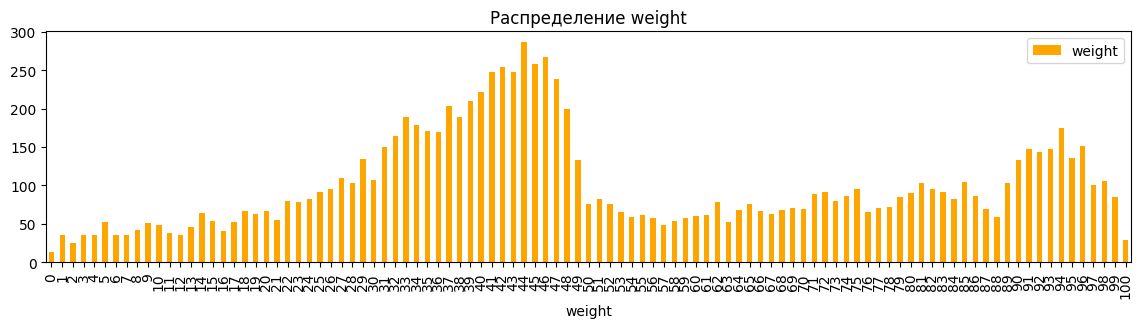

In [15]:
df1 = df.groupby('weight').agg({'weight':'count'})
df1.head()
ax = df1.plot(kind='bar', color='orange', title='Распределение weight',figsize=(14,3))

language
8     9001
19     515
21     113
31     112
10      74
Name: count, dtype: int64



([<matplotlib.patches.Wedge at 0x255633d94c0>,
 [Text(-1.062874516038241, 0.2833685994539182, '8'),
  Text(1.0309325355343089, -0.38363798974658525, '19'),
  Text(1.0867720781250123, -0.1700777769370306, '21'),
  Text(1.0961931071260633, -0.09143670974672652, '31'),
  Text(1.0996914561204771, -0.02605189696787725, '10')])

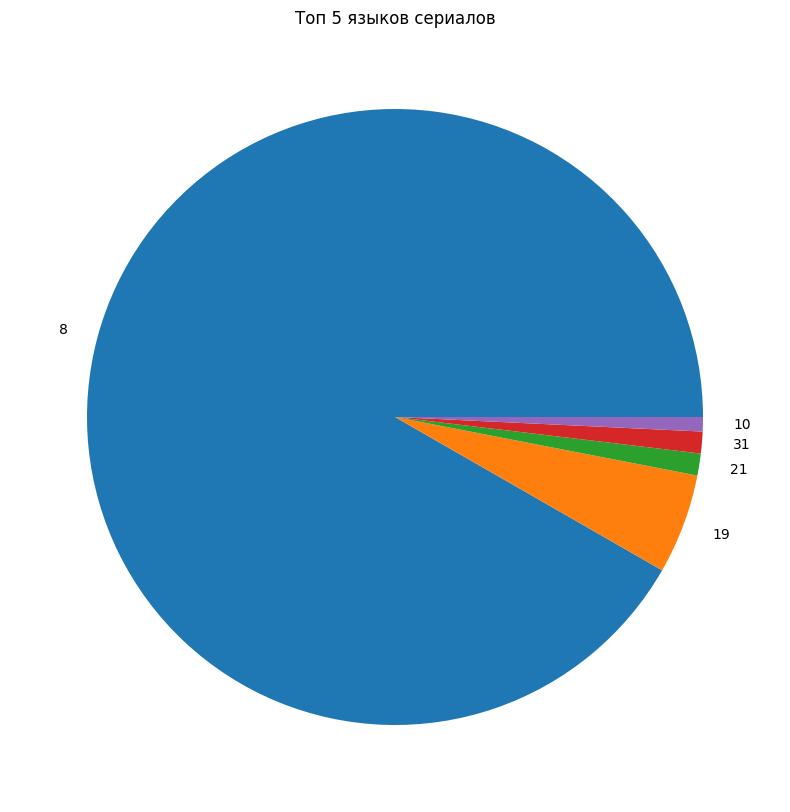

In [57]:
df2 = df.groupby('language')['language'].value_counts().nlargest(5)
print(df2)



d = df2.to_dict()
d = {k: v for k, v in sorted(d.items(), key=lambda item: -item[1])}
print()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Топ 5 языков сериалов')
plt.pie(list(d.values()), labels = list(d.keys()))

In [58]:
df["premiered"] = pd.to_datetime(df["premiered"])

premiered
2021-01-04    16
2022-09-21    12
2020-01-01    10
2018-09-09     9
2020-01-08     9
2023-04-07     9
2023-05-10     9
2019-11-01     8
2021-11-19     8
2022-07-08     8
2023-01-05     8
2011-10-24     7
2012-08-13     7
2015-01-12     7
2016-09-22     7
2018-01-01     7
2018-09-19     7
2018-09-25     7
2018-11-27     7
2019-06-02     7
Name: count, dtype: int64


<Axes: title={'center': 'Топ 20 дней по количеству премьер'}, xlabel='premiered'>

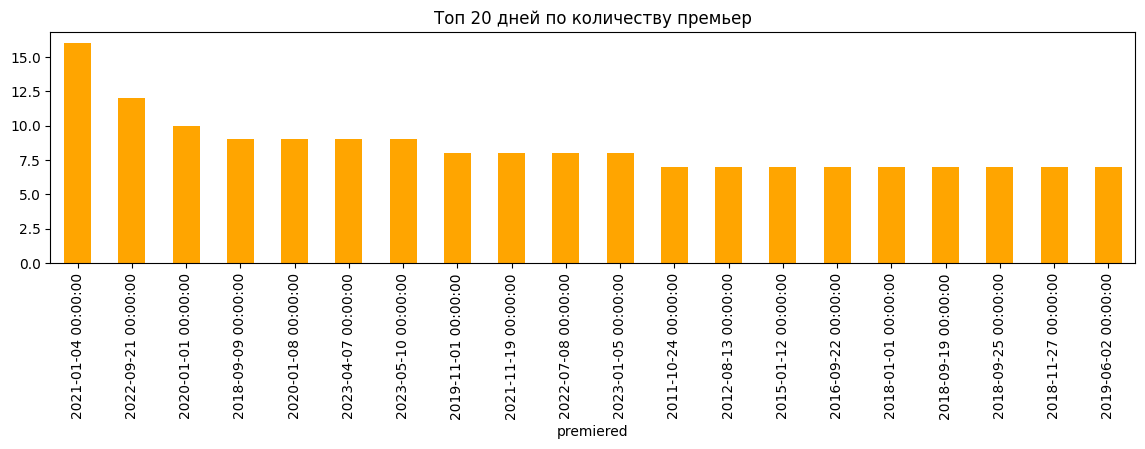

In [72]:
df3 = df.groupby('premiered')['premiered'].value_counts().nlargest(20)
print(df3)
df3.plot(kind='bar', color='orange', title='Топ 20 дней по количеству премьер',figsize=(14,3))

weight
44    286
46    267
45    258
42    254
41    248
43    248
47    238
40    222
39    210
37    203
48    200
33    189
38    189
34    179
94    175
35    171
36    170
32    164
96    151
31    150
Name: count, dtype: int64


<Axes: title={'center': 'Топ 20 самых частых популярностей контента'}, xlabel='weight'>

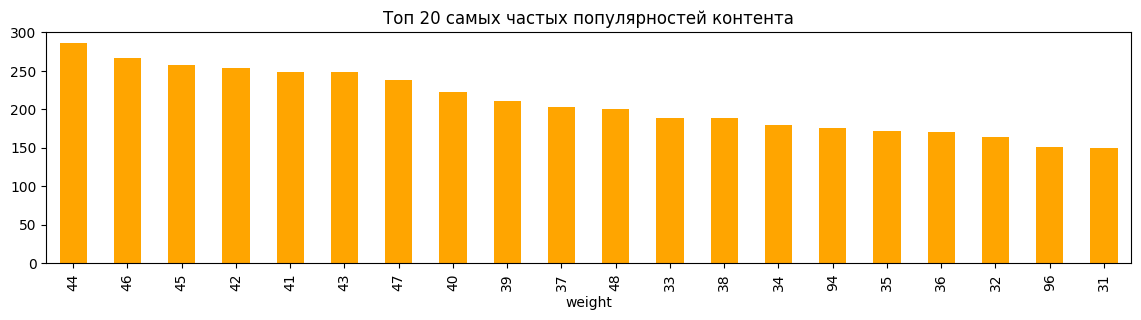

In [76]:
df4 = df.groupby('weight')['weight'].value_counts().nlargest(20)
print(df4)

# Вес - популярность фильма или шоу
df4.plot(kind='bar', color='orange', title='Топ 20 самых частых популярностей контента',figsize=(14,3))

count
1    9663
2     267
3       1
Name: count, dtype: int64



([<matplotlib.patches.Wedge at 0x25571e6e0c0>,
 [Text(-1.0960492152942403, 0.09314567973277199, '1'),
  Text(1.0960196990467241, -0.09349234889298927, '2'),
  Text(1.0999999450902571, -0.00034756500357828685, '3')])

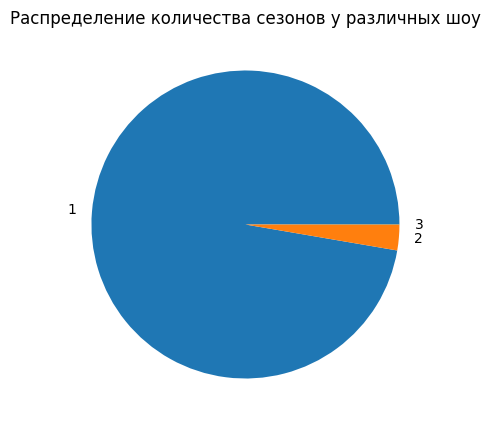

In [81]:
df5 = df.groupby('name')['name'].value_counts().value_counts()
print(df5)

d = df5.to_dict()
d = {k: v for k, v in sorted(d.items(), key=lambda item: -item[1])}
print()
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Распределение количества сезонов у различных шоу')
plt.pie(list(d.values()), labels = list(d.keys()))

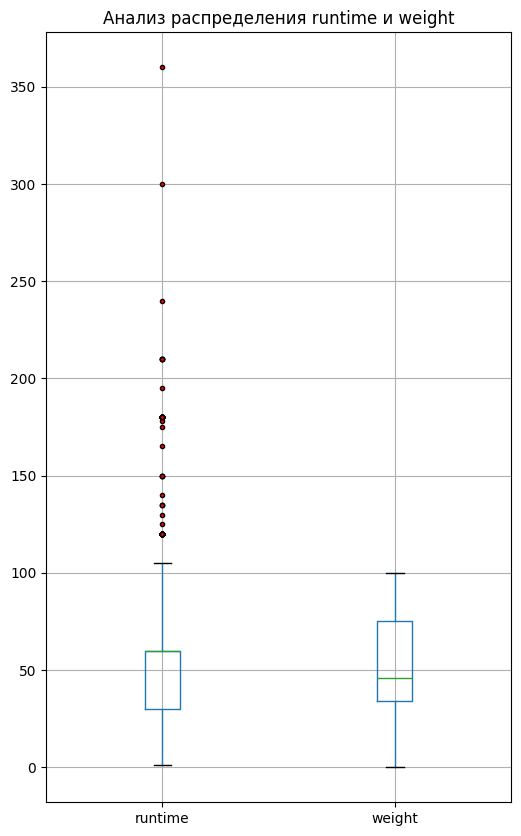

In [87]:
df6 = df[['runtime','weight']]
df6.head()
ax = df6.boxplot(figsize=(6, 10), showfliers=True, flierprops={'marker': '.', 'markerfacecolor': 'red'}).set_title("Анализ распределения runtime и weight")